In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [152]:
df = pd.read_csv('mushroom.csv')

# Task 1: Exploratory Data Analysis (EDA)

In [154]:
df.shape

(2000, 26)

In [155]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [156]:
df.tail()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642


In [157]:
df.duplicated().sum()

1024

In [158]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [159]:
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [160]:
df.duplicated().sum()

1024

In [161]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [162]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

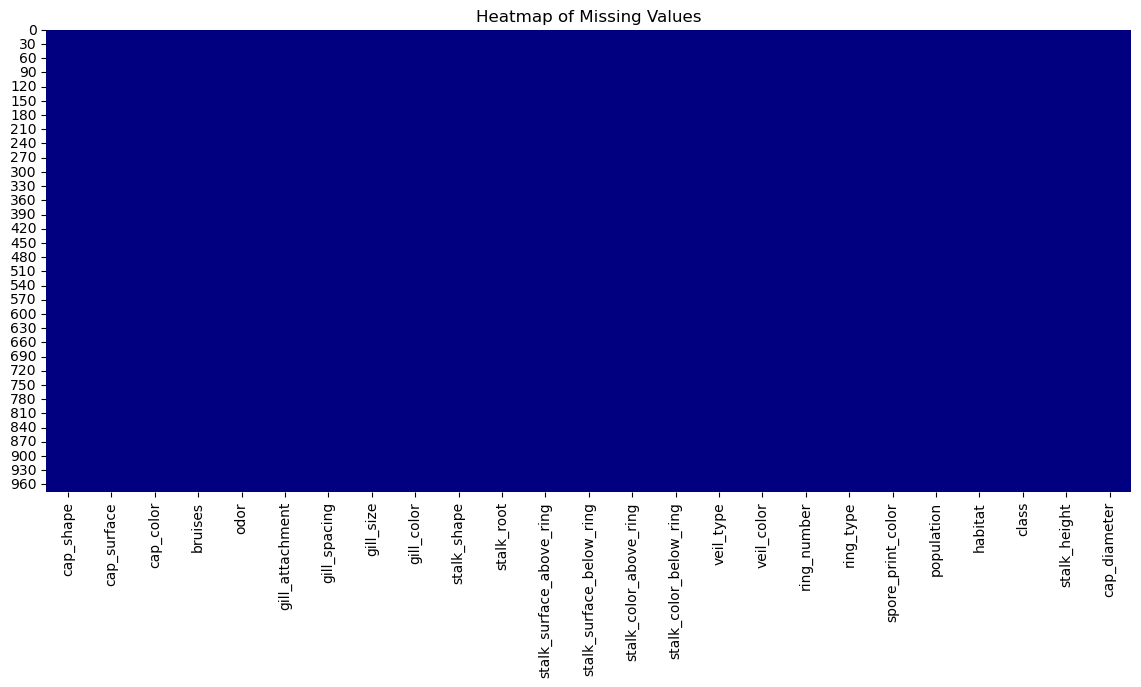

In [163]:
colours = sns.color_palette(["navy", "yellow"])
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap=colours, cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_colo

In [165]:
df.describe()

,stalk_height,cap_diameter
count,976.000000,976.000000
mean,8.524684,12.598566
std,3.703043,6.987077
min,2.000000,1.000000
25%,5.326820,6.141161
50%,8.367245,12.626094
75%,11.758624,18.559780
max,15.095066,25.000054


In [166]:
df.describe(include='object')

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
count,976,976,976,976,976,976,976,976,976,976,...,976,976,976,976,976,976,976,976,976,976
unique,5,4,9,2,9,4,3,2,12,2,...,9,9,2,4,3,8,9,6,7,2
top,sunken,scaly,brown,yes,foul,free,crowded,narrow,green,enlarging,...,brown,yellow,universal,white,none,sheathing,brown,abundant,urban,poisonous
freq,216,292,127,502,126,270,330,498,96,524,...,127,118,500,273,342,135,122,176,153,618


In [167]:
for col in df:
    print({col:df[col].nunique()})

{'cap_shape': 5}
{'cap_surface': 4}
{'cap_color': 9}
{'bruises': 2}
{'odor': 9}
{'gill_attachment': 4}
{'gill_spacing': 3}
{'gill_size': 2}
{'gill_color': 12}
{'stalk_shape': 2}
{'stalk_root': 7}
{'stalk_surface_above_ring': 4}
{'stalk_surface_below_ring': 4}
{'stalk_color_above_ring': 9}
{'stalk_color_below_ring': 9}
{'veil_type': 2}
{'veil_color': 4}
{'ring_number': 3}
{'ring_type': 8}
{'spore_print_color': 9}
{'population': 6}
{'habitat': 7}
{'class': 2}
{'stalk_height': 973}
{'cap_diameter': 976}


In [168]:
for col in df:
    print({col:df[col].unique()})

{'cap_shape': array(['sunken', 'flat', 'bell', 'convex', 'conical'], dtype=object)}
{'cap_surface': array(['scaly', 'fibrous', 'grooves', 'smooth'], dtype=object)}
{'cap_color': array(['white', 'red', 'purple', 'pink', 'yellow', 'brown', 'green',
       'buff', 'gray'], dtype=object)}
{'bruises': array(['no', 'yes'], dtype=object)}
{'odor': array(['anise', 'foul', 'fishy', 'musty', 'spicy', 'none', 'pungent',
       'almond', 'creosote'], dtype=object)}
{'gill_attachment': array(['descending', 'notched', 'free', 'attached'], dtype=object)}
{'gill_spacing': array(['distant', 'crowded', 'close'], dtype=object)}
{'gill_size': array(['broad', 'narrow'], dtype=object)}
{'gill_color': array(['pink', 'chocolate', 'purple', 'orange', 'buff', 'black', 'red',
       'green', 'brown', 'yellow', 'white', 'gray'], dtype=object)}
{'stalk_shape': array(['tapering', 'enlarging'], dtype=object)}
{'stalk_root': array(['cup', 'rooted', 'club', 'missing', 'equal', 'bulbous',
       'rhizomorphs'], dtype=o

In [169]:
for col in df:
    print(df[col].value_counts())

cap_shape
sunken     216
flat       199
conical    193
bell       187
convex     181
Name: count, dtype: int64
cap_surface
scaly      292
smooth     238
fibrous    233
grooves    213
Name: count, dtype: int64
cap_color
brown     127
yellow    114
pink      112
red       110
green     108
gray      105
buff      104
purple    100
white      96
Name: count, dtype: int64
bruises
yes    502
no     474
Name: count, dtype: int64
odor
foul        126
anise       119
fishy       111
musty       111
spicy       110
creosote    107
pungent     101
almond       98
none         93
Name: count, dtype: int64
gill_attachment
free          270
notched       248
attached      244
descending    214
Name: count, dtype: int64
gill_spacing
crowded    330
close      324
distant    322
Name: count, dtype: int64
gill_size
narrow    498
broad     478
Name: count, dtype: int64
gill_color
green        96
orange       95
purple       88
pink         84
black        84
white        82
brown        80
chocolate    

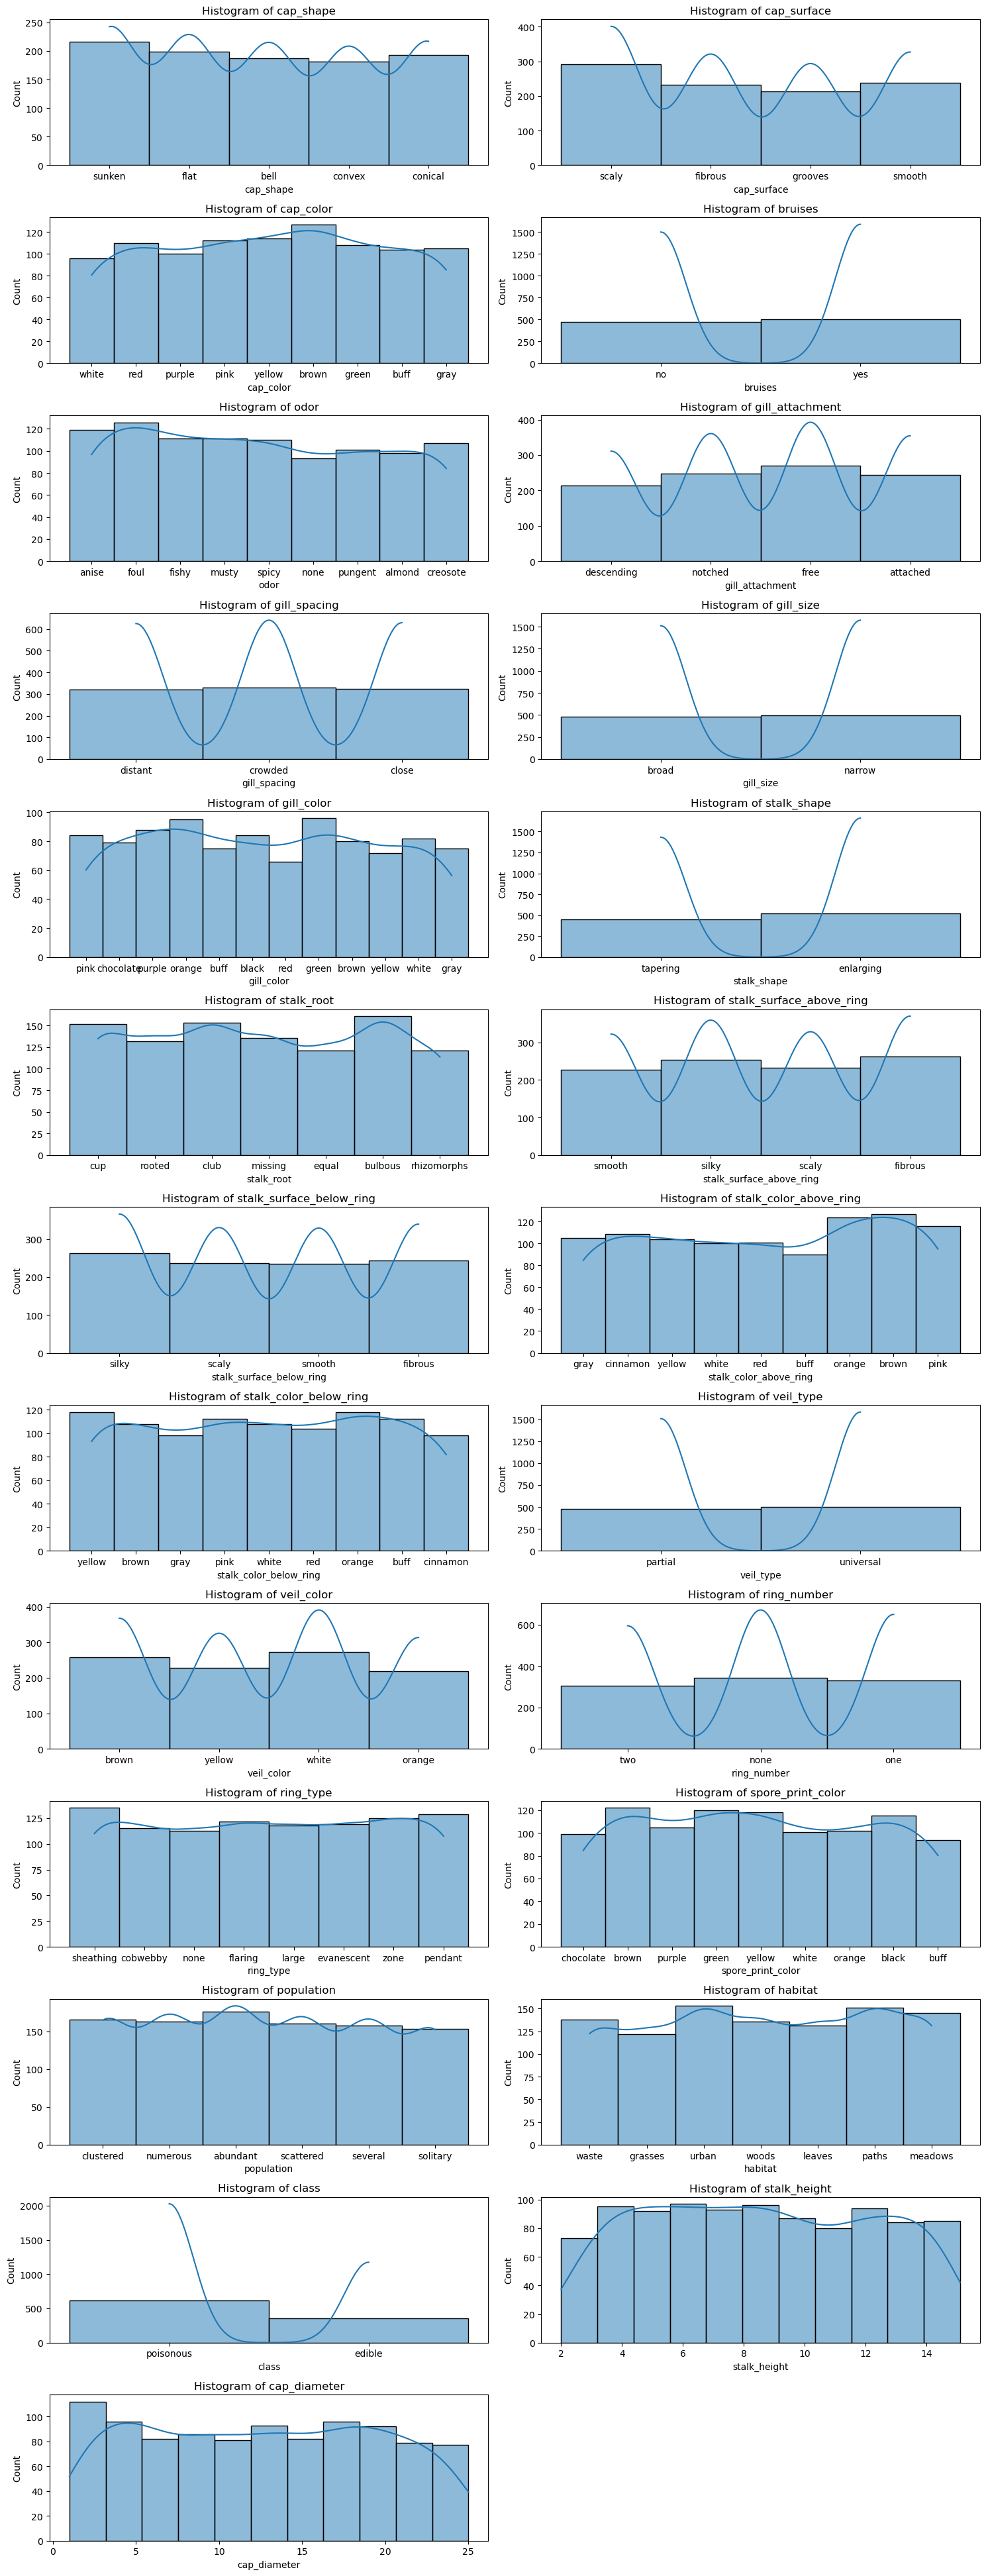

In [170]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

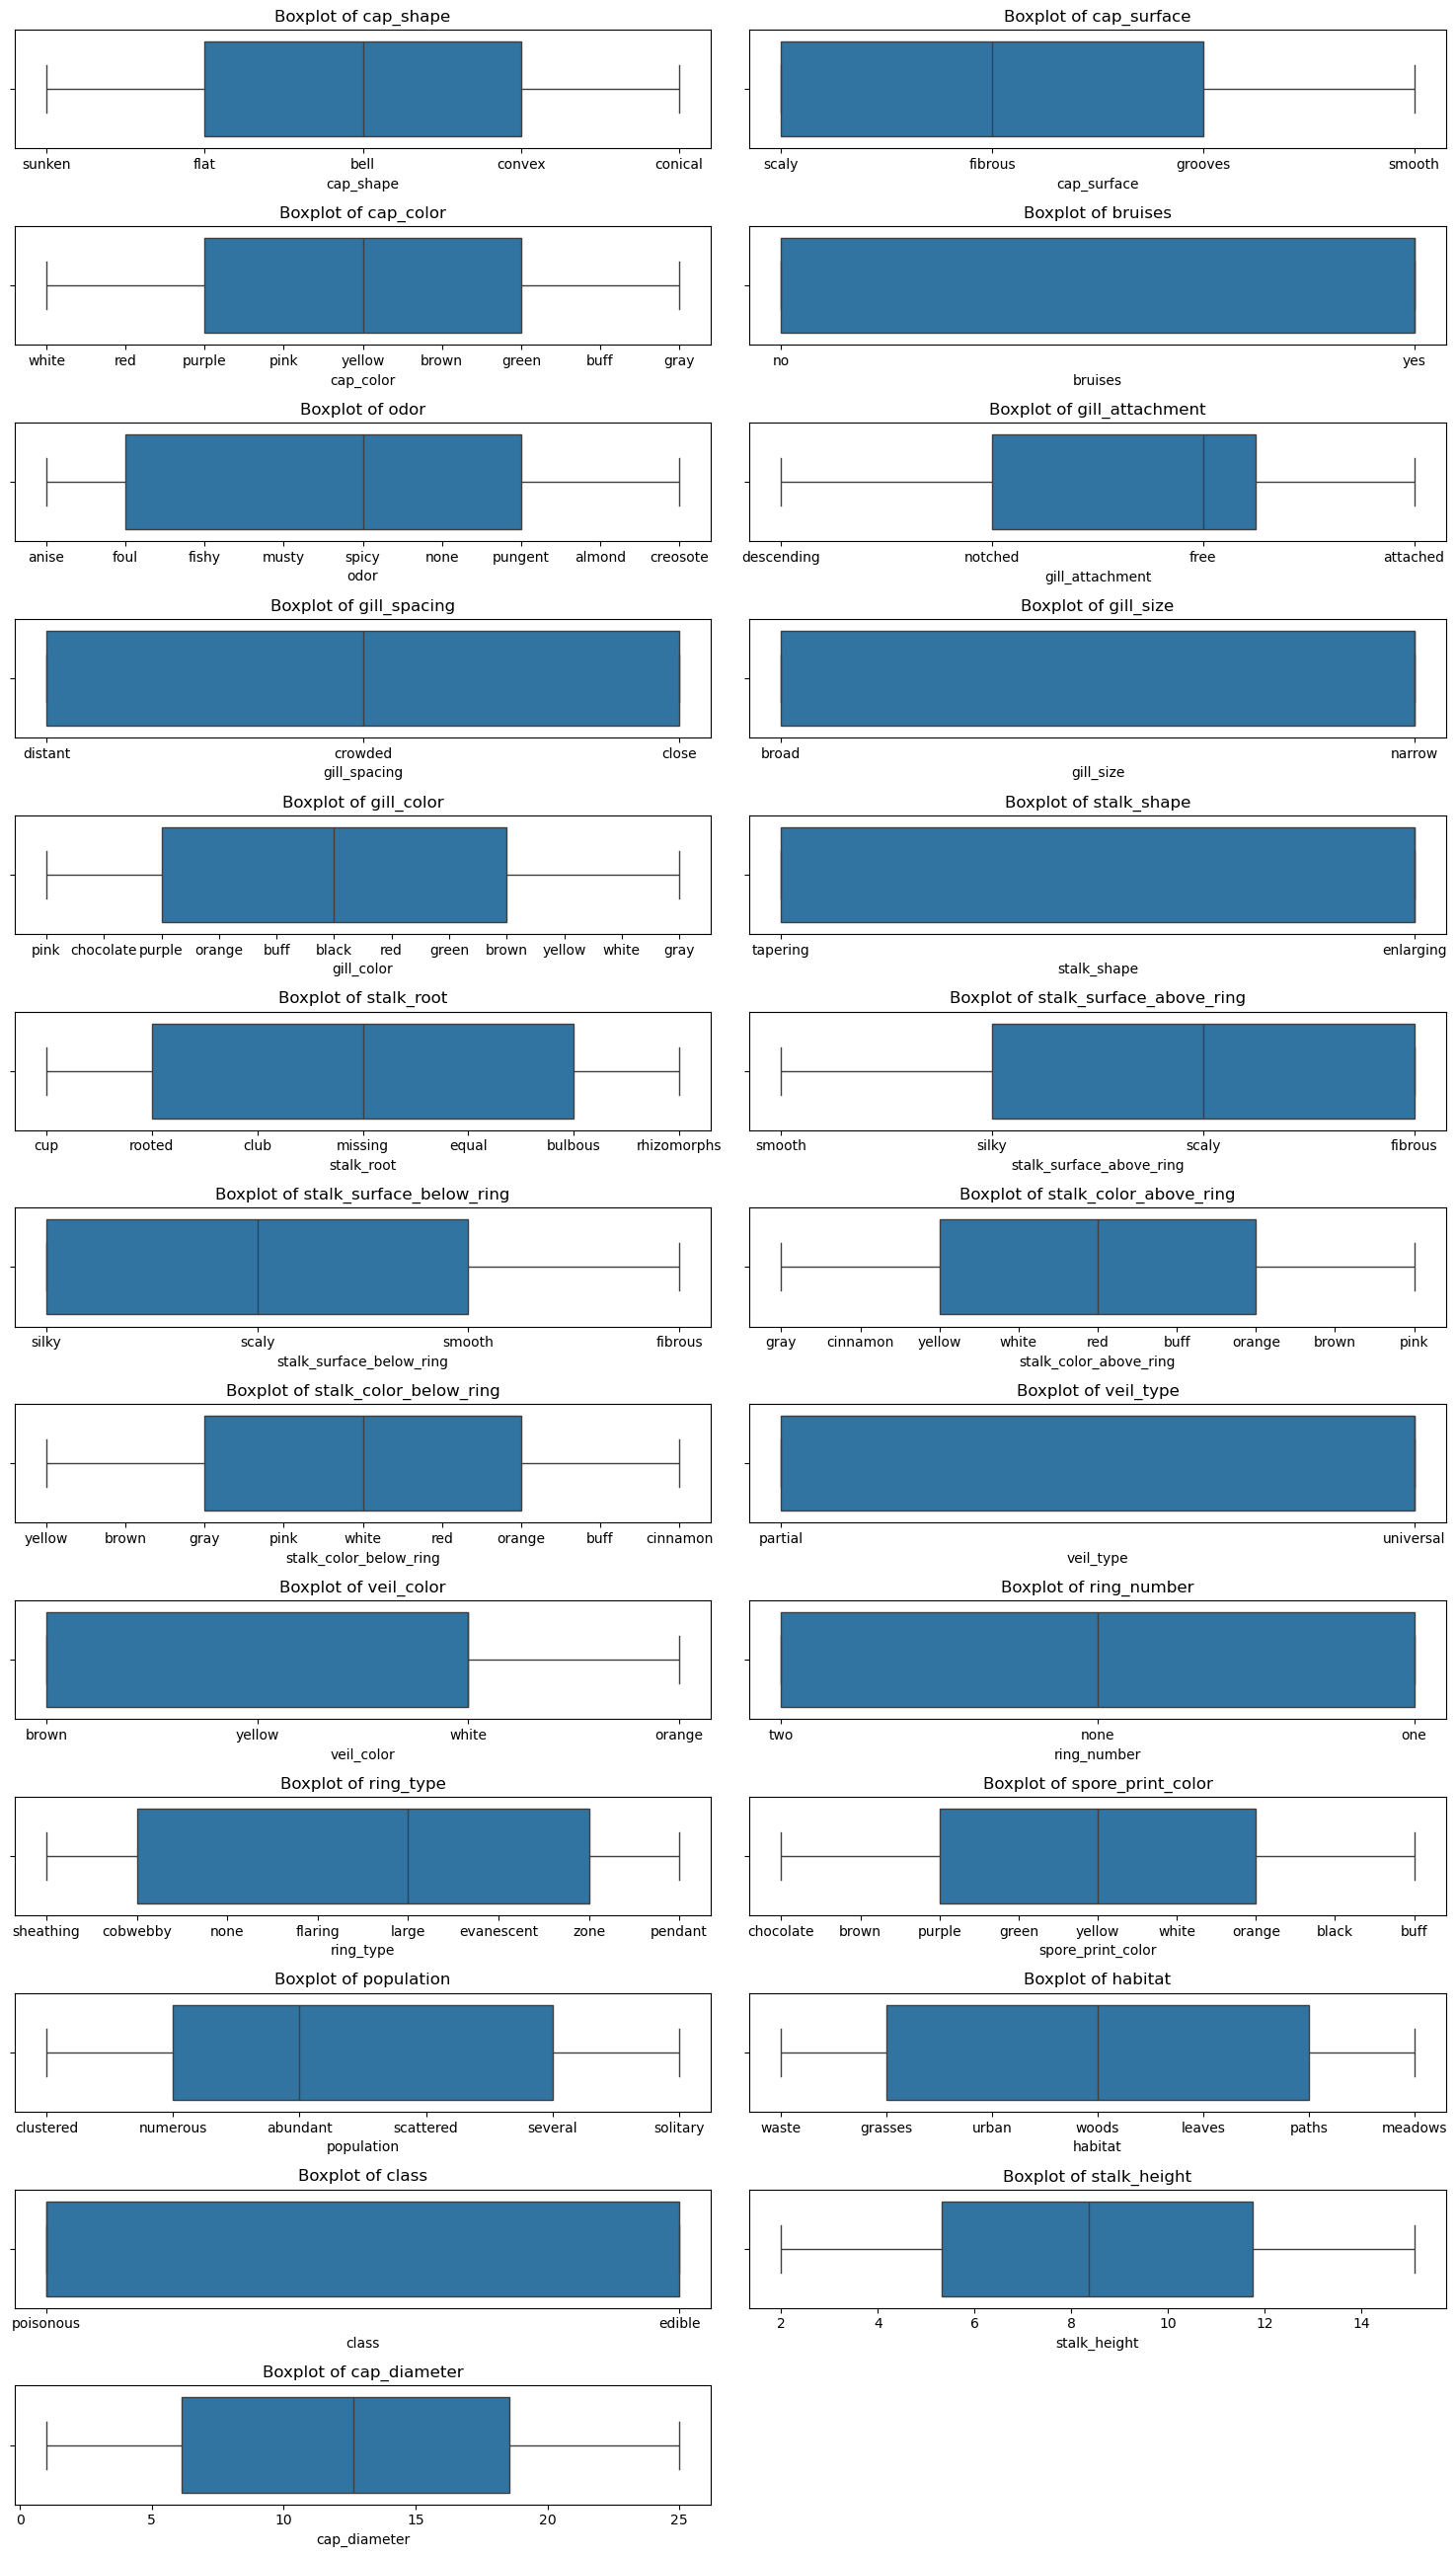

In [171]:
# Boxplot for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [172]:
df.corr(numeric_only=True)

,stalk_height,cap_diameter
stalk_height,1.000000,-0.034891
cap_diameter,-0.034891,1.000000


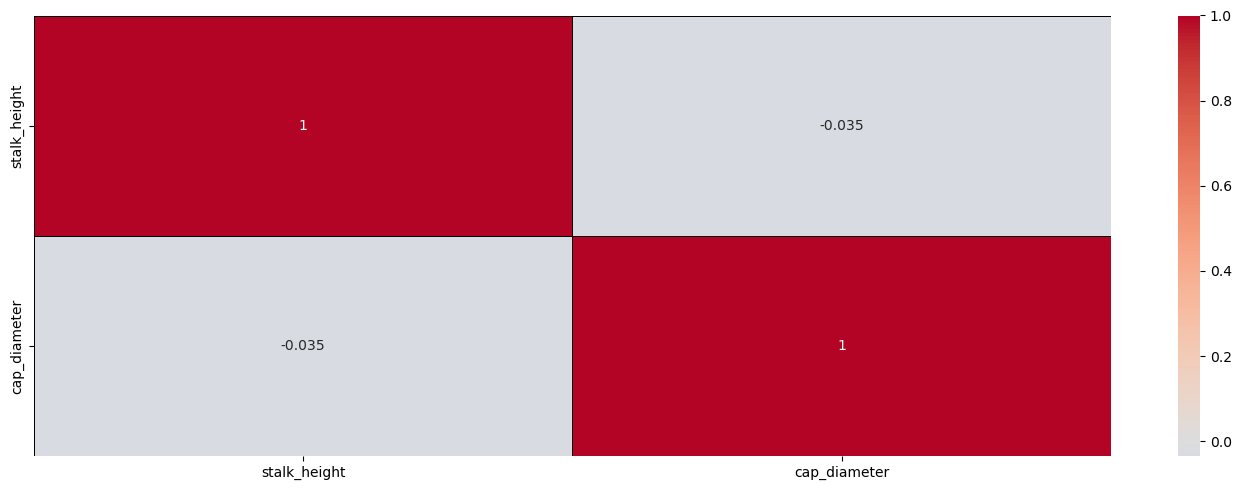

In [173]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=df.corr(numeric_only=True),cmap='coolwarm',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.show()

# Task 2: Data Preprocessing

In [175]:
df = pd.get_dummies(df, drop_first=True, dtype='int64')

In [176]:
df.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,14.276173,5.054983,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3.952715,19.068319,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.054265,7.205884,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5.226499,20.932692,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14.037532,12.545245,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [177]:
# scaler = MinMaxScaler()
# df[['stalk_height', 'cap_diameter']] = scaler.fit_transform(df[['stalk_height', 'cap_diameter']])

In [178]:
X = df.drop(columns='class_poisonous')
y = df['class_poisonous']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Task 3: Data Visualization

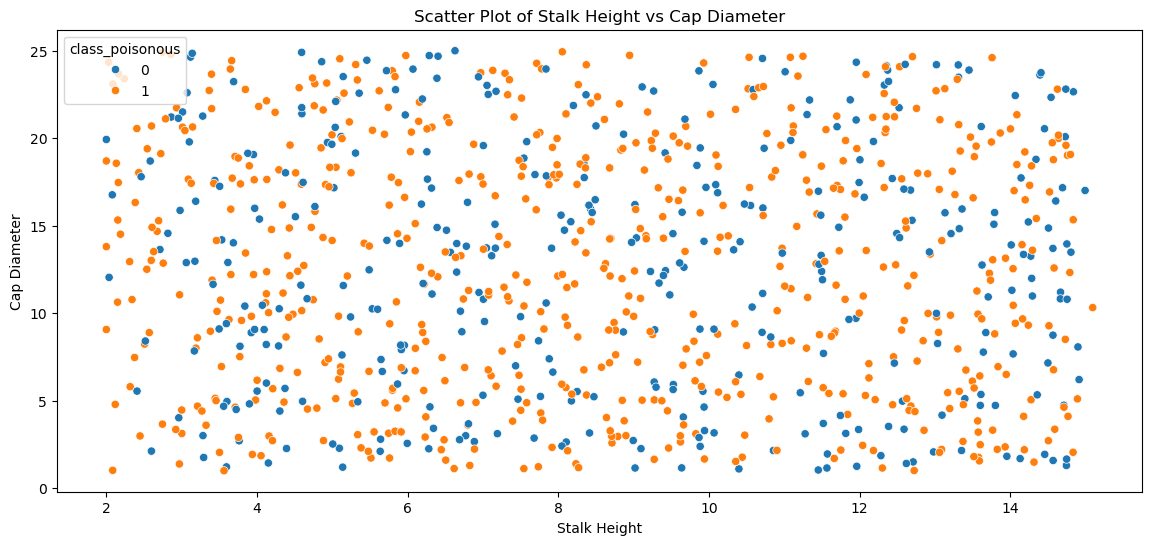

In [181]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class_poisonous')
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

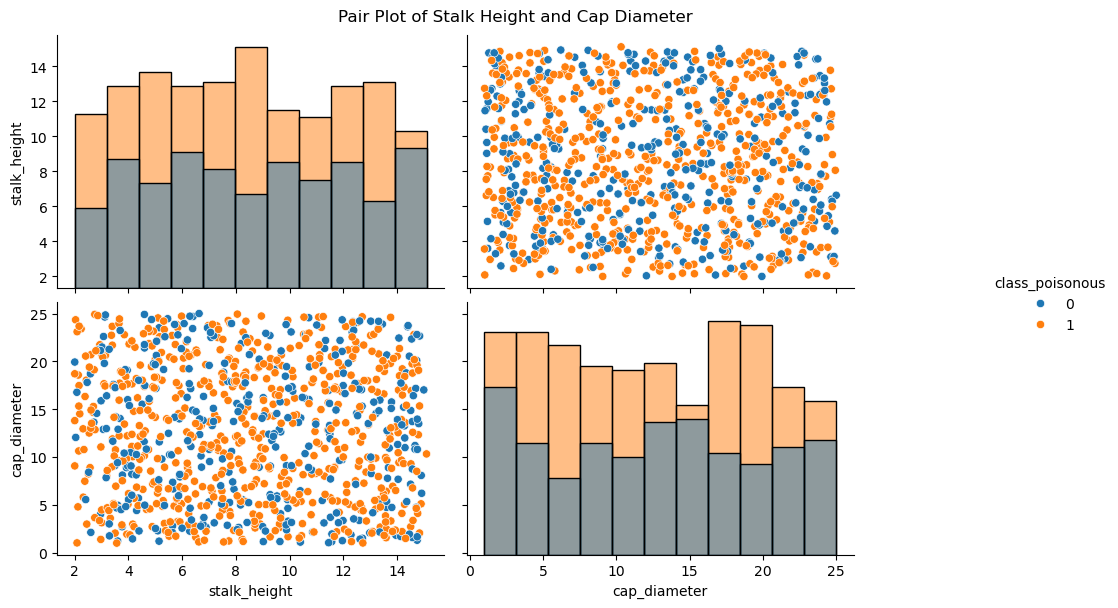

In [182]:
g = sns.pairplot(data=df[['stalk_height','cap_diameter', 'class_poisonous']], hue='class_poisonous', diag_kind='hist')
g.fig.set_size_inches(12,6)
g.fig.suptitle('Pair Plot of Stalk Height and Cap Diameter', y=1.02)
plt.show()

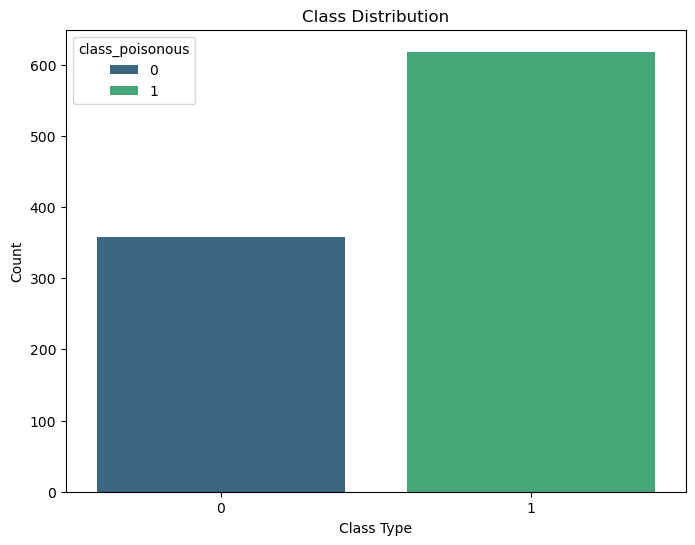

In [183]:
# Count plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class_poisonous', data=df, hue='class_poisonous', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

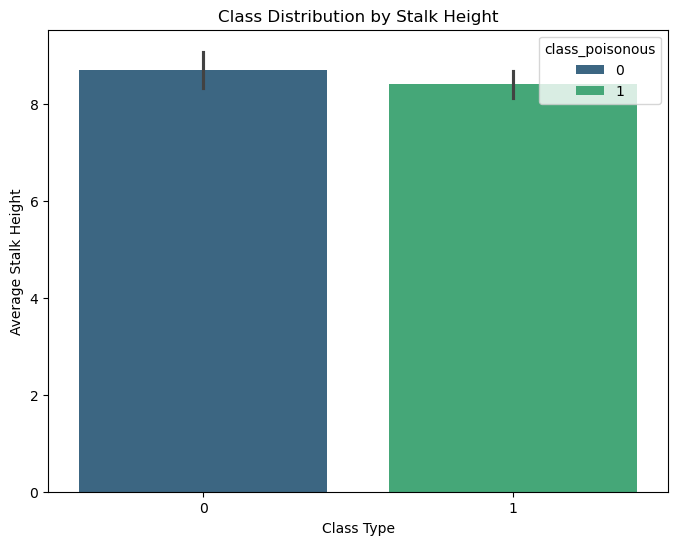

In [184]:
# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='class_poisonous', y='stalk_height', data=df, hue='class_poisonous', palette='viridis')
plt.title('Class Distribution by Stalk Height')
plt.xlabel('Class Type')
plt.ylabel('Average Stalk Height')
plt.show()

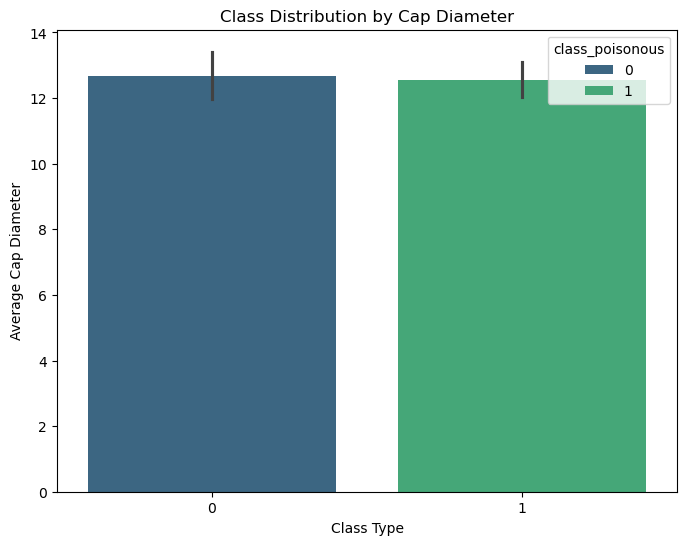

In [185]:
# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='class_poisonous', y='cap_diameter', data=df, hue='class_poisonous', palette='viridis')
plt.title('Class Distribution by Cap Diameter')
plt.xlabel('Class Type')
plt.ylabel('Average Cap Diameter')
plt.show()

# Task 4: SVM Implementation

In [187]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [188]:
y_pred = clf.predict(X_test)

In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [190]:
confusion_matrix(y_test, y_pred)

array([[  0,  72],
       [  0, 124]], dtype=int64)

In [191]:
print('Accuracy =', accuracy_score(y_test, y_pred) * 100)
print('Precision =', precision_score(y_test, y_pred) * 100)
print('Recall =', recall_score(y_test, y_pred) * 100)
print('F1-score =', f1_score(y_test, y_pred) * 100)

Accuracy = 63.26530612244898
Precision = 63.26530612244898
Recall = 100.0
F1-score = 77.5


# Task 5: Visualization of SVM Results

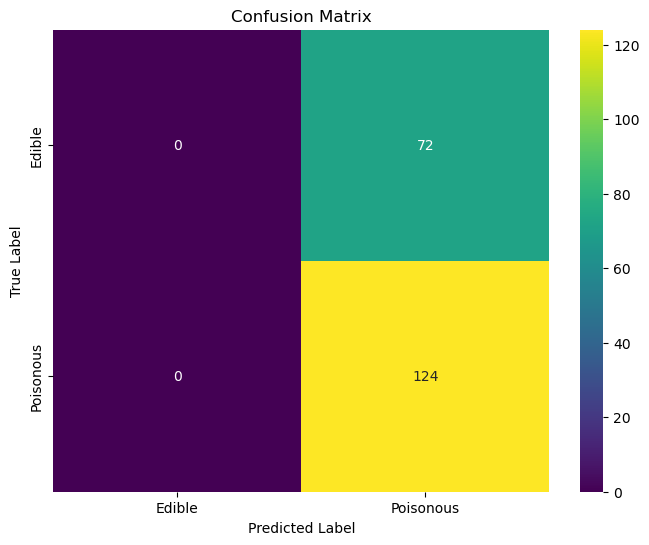

In [193]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Edible', 'Poisonous'], columns=['Edible', 'Poisonous'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='viridis', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

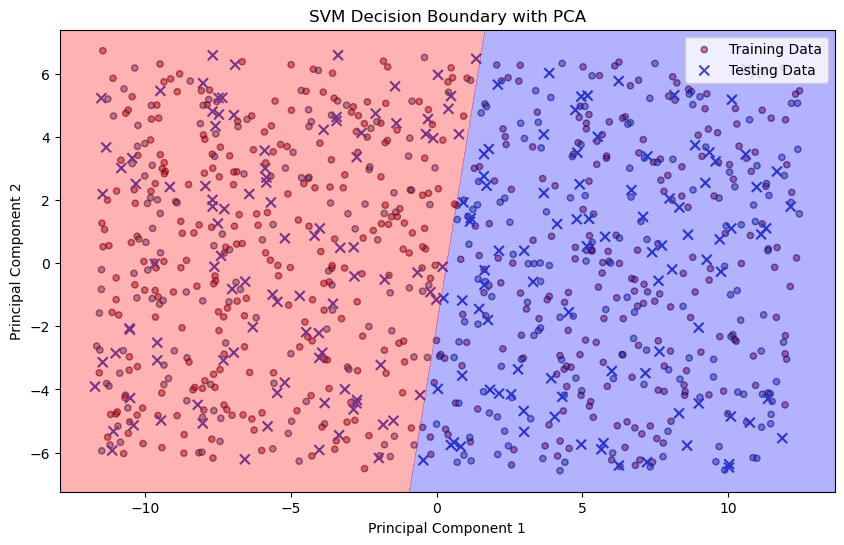

In [194]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain SVM on reduced dimensions
svm_classifier_pca = SVC(kernel='linear', random_state=42)
svm_classifier_pca.fit(X_train_pca, y_train)

# Make predictions on the reduced test set
y_pred_pca = svm_classifier_pca.predict(X_test_pca)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))

# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', s=20, edgecolors='k', alpha=0.5, label='Training Data')

# Plot testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, cmap='coolwarm', s=50, marker='x', label='Testing Data')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
Z = svm_classifier_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Correct contour levels
levels = np.linspace(Z.min(), Z.max(), 3)
ax.contourf(xx, yy, Z, levels=levels, alpha=0.3, colors=['blue', 'red'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.legend()
plt.show()

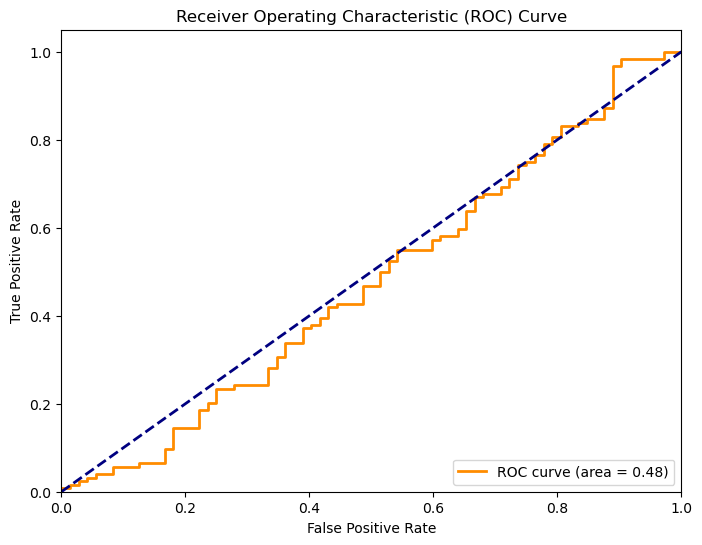

In [195]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Task 6: Parameter Tuning and Optimization

In [197]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [198]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.6333333333333333)

In [199]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 63.26530612244898


array([[  0,  72],
       [  0, 124]], dtype=int64)

# Task 7: Comparison and Analysis

In [201]:
clf = SVC(kernel= "linear")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 58.16326530612245


array([[ 13,  59],
       [ 23, 101]], dtype=int64)

In [202]:
clf = SVC(kernel= "poly")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 63.26530612244898


array([[  0,  72],
       [  0, 124]], dtype=int64)

# Analysis of SVM Strengths and Weaknesses for the Mushroom Dataset
Strengths
Effective in High-Dimensional Spaces: SVM is highly effective in scenarios where the number of dimensions (features) is high. The mushroom dataset has numerous categorical features that, when encoded, result in a high-dimensional feature space. SVM performs well in this context.

Robust to Overfitting: With the right choice of regularization parameter (C), SVM can be robust to overfitting, especially in high-dimensional spaces. This is evident in the mushroom dataset, where SVM provides a good balance between bias and variance.

Effective with Clear Margin of Separation: SVMs are particularly effective when there is a clear margin of separation between classes. The mushroom dataset, with its categorical features, often results in well-separated classes, making SVM a suitable choice.

Support for Non-Linear Classification: Although we used a linear kernel in the example, SVMs support various kernel functions (e.g., RBF, polynomial) that can model complex non-linear relationships. This flexibility can be advantageous for datasets with non-linear class boundaries.

Weaknesses
Computationally Intensive: Training SVMs, especially with non-linear kernels, can be computationally intensive and time-consuming, particularly for large datasets. The mushroom dataset is relatively small, but scaling up to larger datasets can pose challenges.

Difficult Parameter Tuning: SVMs require careful tuning of parameters (e.g., C, kernel parameters). Inappropriate parameter choices can lead to suboptimal performance. For the mushroom dataset, we used a linear kernel, but other kernels would require extensive cross-validation to optimize.

Sensitivity to Imbalanced Data: SVMs can be sensitive to class imbalance. If one class significantly outnumbers the other, SVM may bias towards the majority class. While the mushroom dataset is balanced, in real-world applications, class imbalance can affect SVM performance.

Black Box Nature: SVMs do not provide easily interpretable models. Understanding the decision boundary or the importance of individual features is not straightforward, which can be a limitation in applications requiring model interpretability.

# Practical Implications of SVM in Real-World Classification Tasks
Applications in Medical Diagnosis: SVMs are widely used in medical diagnosis, such as cancer detection from medical imaging. Their ability to handle high-dimensional data and create clear decision boundaries makes them suitable for distinguishing between healthy and diseased states.

Text Classification: SVMs are effective in text classification tasks, such as spam detection, sentiment analysis, and document categorization. Their robustness to high-dimensional feature spaces (e.g., word vectors) and ability to handle sparse data are advantageous in these applications.

Financial Sector: In finance, SVMs are used for credit scoring, fraud detection, and risk management. Their robustness to overfitting and ability to handle complex patterns are beneficial in predicting default risk or fraudulent transactions.

Bioinformatics: SVMs are employed in bioinformatics for tasks such as gene expression analysis and protein classification. Their capacity to handle large and high-dimensional biological datasets makes them a popular choice in this domain.

Image Classification and Recognition: SVMs are used in image classification and face recognition tasks. Their performance in high-dimensional spaces and support for non-linear kernels allow them to effectively classify images based on pixel intensities or other features.

Summary
SVMs offer several strengths, particularly in handling high-dimensional data and providing robust classification with clear margins. However, they also have weaknesses, such as computational intensity and sensitivity to parameter tuning. Understanding these strengths and weaknesses is crucial for leveraging SVMs effectively in real-world applications. Their practical implications span diverse fields, including medical diagnosis, text classification, finance, bioinformatics, and image recognition, showcasing their versatility and effectiveness as a classification tool.